In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime
from datetime import timedelta

%matplotlib inline

In [2]:
df = pd.read_excel('Patch-seq log - Mouse PatchSeq.xlsx')

In [3]:
#go ahead and look at the dataframe
df.head()

,Date,User,Rig #,File,Ephys,Trans,Morph,Pilot,Pilot Details,cell type,...,Plate,Comments,Stacis call for reconstructions,Stacis call for class,Confidence,Bad dates,Notes.1,Unnamed: 76,Unnamed: 77,Unnamed: 78
NaN,160318,P5,NaN,Ndnf - brl_160318_04,x,x,y,NaN,NaN,tdt+,...,NaN,NaN,F,aspiny,NaN,NaN,0,NaN,234626,NaN
NaN,160318,P5,NaN,Ndnf - brl_160318_07,x,x,y,NaN,NaN,tdt+,...,NaN,NaN,F,aspiny,blebby,NaN,0,NaN,234626,NaN
NaN,160318,P5,NaN,Ndnf - brl_160318_08,x,NaN,n,NaN,NaN,tdt+,...,NaN,NaN,n,NaN,NaN,NaN,NaN,NaN,234626,NaN
NaN,160318,P5,NaN,Ndnf - brl_160318_x,NaN,x,n,NaN,NaN,tdt+,...,NaN,NaN,n,NaN,NaN,NaN,0,NaN,234626,NaN
NaN,160406,P5,NaN,Ndnf - brl_160406_01,x,NaN,n,NaN,NaN,tdt+,...,NaN,NaN,n,NaN,NaN,NaN,NaN,NaN,237572,"used slice 7, right and left, likely somatosen..."


In [4]:
df['date_format'] = df['Date'].map(lambda x: pd.to_datetime(x, format = '%y%m%d'))

In [5]:
dic = {
    'No-Seal' : 'No-Seal',
    'Partial-Nucleus': 'Partial-Nucleus',
    'Outside-Out': 'Outside-Out',
    'nr': 'missing',
    'Nucleated': 'Nucleated',
    'Entire-Cell': "Entire-Cell",
    'outside-out':'Outside-Out',
    'Outside-Out?': 'Outside-Out',
    'no-seal': 'No-Seal',
    'nucelated': 'Nucleated',
    'no -seal': 'No-Seal',
    'missing': 'missing',
    'nan': 'missing'
    }


did = {
    'P1': 'P1',
    'P2': 'P2',
    'P3': 'P3',
    'P4': 'P4',
    'P5': 'P5',
    'P6': 'P6',
    'P6 ': 'P6',
    'P8': 'P8'
}

die = {
    'n': 'n',
    'z': 'na',
    'y': 'y',
    'na': 'na',
    'q': 'q',
    'x': 'y',
    '?': 'q',
    ' n': 'n'
}


df['Post patch?'] = df['Post patch?'].fillna('missing')
df['Post patch?'] = df['Post patch?'].map(lambda x: dic[x])

df['Morph'] = df['Morph'].fillna('n')
df['patch duration'] = df['patch duration'].fillna(0)

df['User'] = df['User'].map(lambda x: did[x])
df['Morph'] = df['Morph'].map(lambda x: die[x])

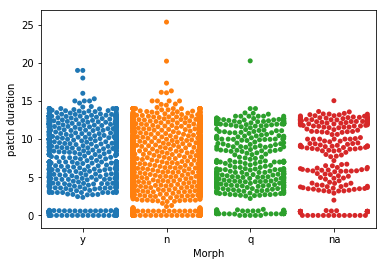

In [6]:
sns.swarmplot(x = 'Morph', y = 'patch duration', data = df)

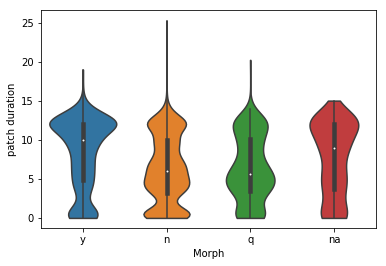

In [7]:
sns.violinplot(x = 'Morph', y = 'patch duration', data = df, scale = 'area', cut = 0)

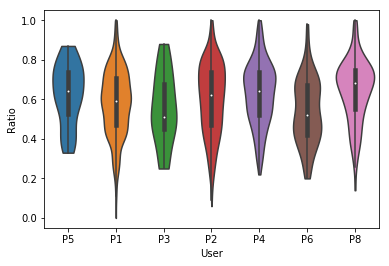

In [8]:
sns.violinplot(x = 'User', y = 'Ratio', data = df, scale = 'area', cut = 0)

In [9]:
columns  = [
            'date', 
            'preps',
            'cells', 
            'avg_ratio',
            'avg_<400',
            'avg_>400', 
            'std_ratio', 
            'std_<400', 
            'std_>400'
           ]

df_date = pd.DataFrame(columns = columns )

for i, date in enumerate(df['Date'].unique()):
    temp = df[df['Date'] == date]
    preps = len(temp)
    cells = len(temp)
    avg_ratio = temp['Ratio'].mean()
    avg_L400 = temp['<400'].mean()
    avg_G400 = temp['>400'].mean()
    std_ratio = temp['Ratio'].std()
    std_L400 = temp['<400'].std()
    std_G400 = temp['>400'].std()
    df_date.loc[i] = [date, 
                       preps, 
                       cells, 
                       avg_ratio, 
                       avg_L400, 
                       avg_G400, 
                       std_ratio, 
                       std_L400, 
                       std_G400]

In [10]:
df_date.head()

,date,preps,cells,avg_ratio,avg_<400,avg_>400,std_ratio,std_<400,std_>400
0,160318.0,4.0,4.0,0.820000,59.152500,200.000000,0.017321,15.277206,139.551663
1,160406.0,8.0,8.0,0.665000,57.362500,92.391250,0.132023,29.897937,45.450646
2,160407.0,9.0,9.0,0.780000,23.153333,74.081111,0.060000,9.874671,52.151243
3,160408.0,7.0,7.0,0.551429,110.285714,144.285714,0.229523,56.544125,81.873305
4,160411.0,13.0,13.0,0.656000,124.630769,115.692308,0.081731,91.560933,110.595903


In [11]:
df['prep'] = df['Slice (Lims ID?)'].map(lambda x: x.split('-')[-1].split('.')[0])

AttributeError: 'float' object has no attribute 'split'

In [120]:
columns  = [
            'prep',
            'cells', 
            'avg_ratio',
            'avg_<400',
            'avg_>400', 
            'std_ratio', 
            'std_<400', 
            'std_>400'
           ]

df_prep = pd.DataFrame(columns = columns )

for i, prep in enumerate(df['prep'].unique()):
    temp = df[df['prep'] == prep]
    cells = len(temp)
    avg_ratio = temp['Ratio'].mean()
    avg_L400 = temp['<400'].mean()
    avg_G400 = temp['>400'].mean()
    std_ratio = temp['Ratio'].std()
    std_L400 = temp['<400'].std()
    std_G400 = temp['>400'].std()
    df_prep.loc[i] = [prep, 
                       cells, 
                       avg_ratio, 
                       avg_L400, 
                       avg_G400, 
                       std_ratio, 
                       std_L400, 
                       std_G400]

In [121]:
df_prep.head()

,prep,cells,avg_ratio,avg_<400,avg_>400,std_ratio,std_<400,std_>400
0,238372,3.0,0.18,274.170000,61.980000,NaN,219.540797,54.362697
1,247245,2.0,0.54,173.500000,203.000000,0.127279,54.447222,39.597980
2,247246,1.0,0.46,233.000000,201.000000,NaN,NaN,NaN
3,243617,2.0,0.46,286.895000,122.655000,NaN,175.213989,23.115321
4,280189,12.0,0.54,92.916667,97.833333,0.202843,71.717195,71.845584


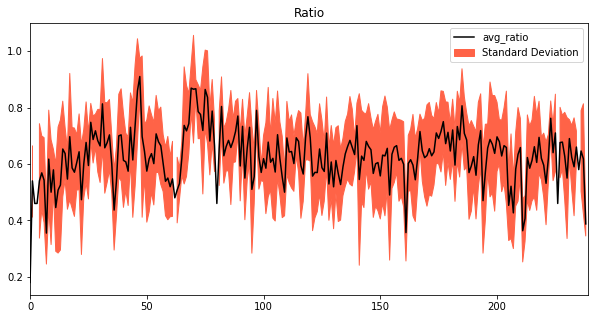

In [122]:
plt.figure(figsize =(10,5))
plt.plot(np.arange(0, len(df_prep)), df_prep['avg_ratio'], color = 'black')
plt.fill_between(np.arange(0, len(df_prep)), 
                df_prep['avg_ratio'] - df_prep['std_ratio'], 
                df_prep['avg_ratio'] + df_prep['std_ratio'],
                color = 'tomato',
                label = 'Standard Deviation')
plt.xlim(0,len(df_prep))
plt.title('Ratio')
plt.legend()

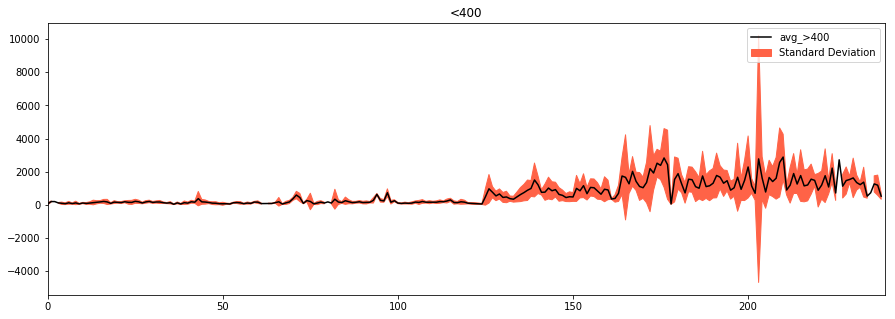

In [123]:
plt.figure(figsize =(15,5))
plt.plot(np.arange(0, len(df_prep)), df_prep['avg_>400'], color = 'black')
plt.fill_between(np.arange(0, len(df_prep)), 
                df_prep['avg_>400'] - df_prep['std_>400'], 
                df_prep['avg_>400'] + df_prep['std_>400'],
                color = 'tomato', 
                label = 'Standard Deviation')
plt.xlim(0,len(df_prep))
plt.title('<400')
plt.legend()

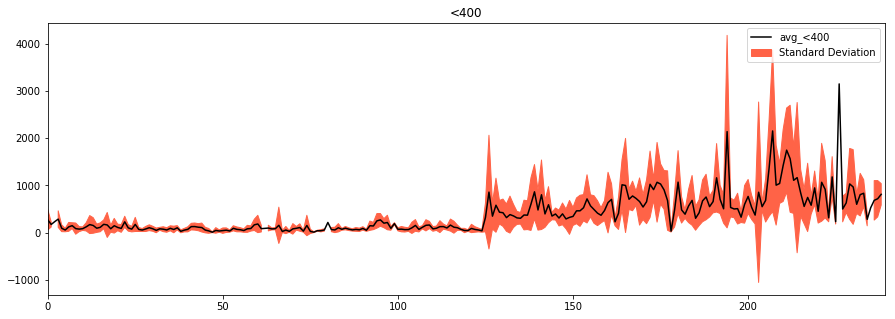

In [124]:
plt.figure(figsize =(15,5))
plt.plot(np.arange(0, len(df_prep)), df_prep['avg_<400'], color = 'black')
plt.fill_between(np.arange(0, len(df_prep)), 
                df_prep['avg_<400'] - df_prep['std_<400'], 
                df_prep['avg_<400'] + df_prep['std_<400'],
                color = 'tomato',
                label = "Standard Deviation")
plt.xlim(0,len(df_prep))
plt.title('<400')
plt.legend()

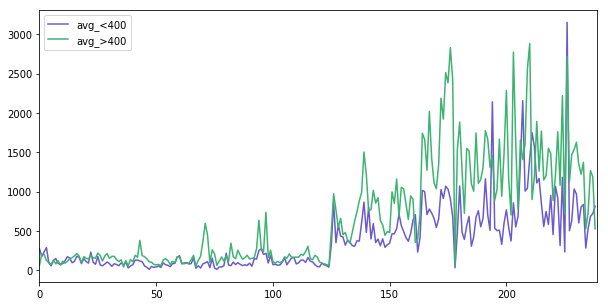

In [125]:

plt.figure(figsize =(10,5))
plt.plot(np.arange(0,len(df_prep)),df_prep['avg_<400'], color = 'slateblue')
plt.plot(np.arange(0,len(df_prep)),df_prep['avg_>400'], color = 'mediumseagreen')
plt.xlim(0,len(df_prep))
plt.legend()

In [15]:
plt.figure(figsize =(20,5))

x = np.arange(0,len(df_prep))
y1 = df_prep['avg_<400']
y2 = df_prep['avg_>400']

plt.fill_between(x, y1, y2, where=y2 >= y1, facecolor='green', interpolate=True, label = 'More Big cDNA')
plt.fill_between(x, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True, label = 'More Contamination?')

plt.xlim(0,len(df_prep))
plt.legend()
plt.title('cDNA Reads by Mouse Prep')
plt.ylabel('Number of Reads')

NameError: name 'df_prep' is not defined

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

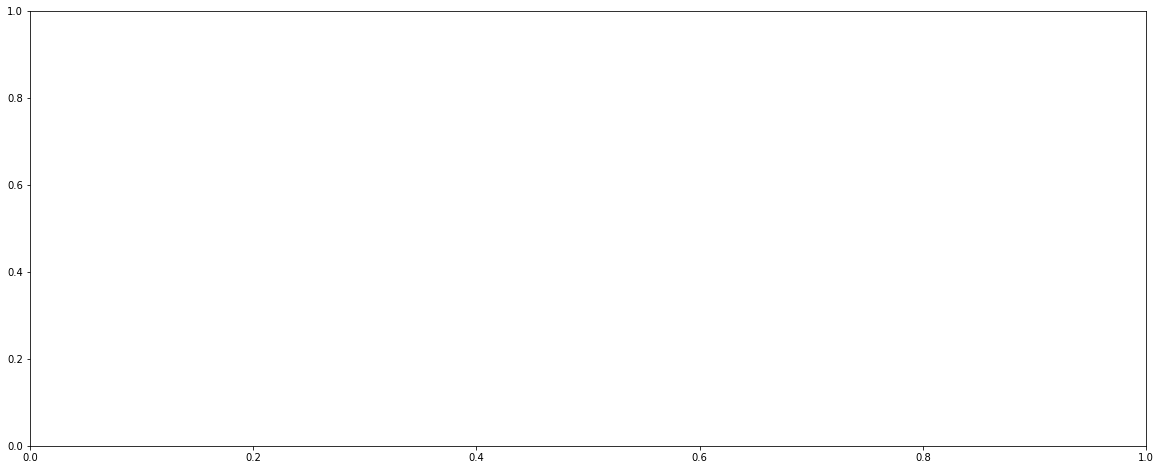

In [14]:
plt.figure(figsize =(20,8))

x = np.arange(0,len(df_date))
y1 = df_date['avg_<400']
y2 = df_date['avg_>400']

plt.fill_between(x, y1, y2, where=y2 >= y1, facecolor='green', interpolate=True, label = 'More Big cDNA')
plt.fill_between(x, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True, label = 'More Contamination?')

plt.xlim(0,len(df_date))
plt.legend()
plt.title('cDNA Reads by Date')
plt.ylabel('Number of Reads')

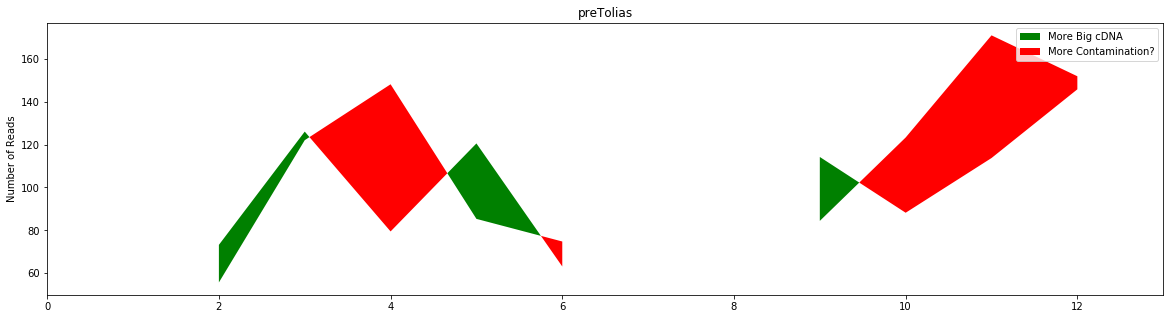

In [175]:
start = 161021
end = 161104
title = 'preTolias'

plt.figure(figsize =(20,5))

x = np.arange(0,len(df_date[(df_date['date'] > start) & (df_date['date'] < end)]))
y1 = df_date[(df_date['date'] > start) & (df_date['date'] < end)]['avg_<400']
y2 = df_date[(df_date['date'] > start) & (df_date['date'] < end)]['avg_>400']

#plt.yscale('log')
plt.fill_between(x, y1, y2, where=y2 >= y1, facecolor='green', interpolate=True, label = 'More Big cDNA')
plt.fill_between(x, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True, label = 'More Contamination?')



plt.xlim(0,len(df_date[(df_date['date'] > start) & (df_date['date'] < end)]))
#plt.ylim(0, )
plt.legend()
plt.title(title)
plt.ylabel('Number of Reads')

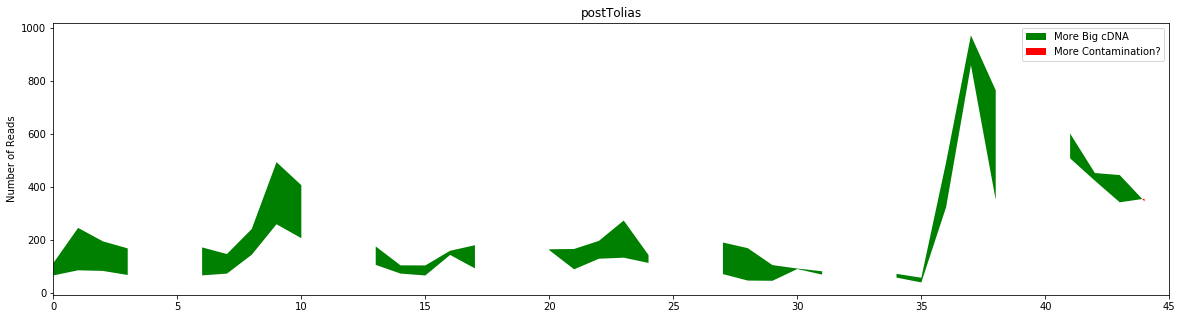

In [182]:
start = 170313
end = 170428
title = 'postTolias'

plt.figure(figsize =(20,5))

x = np.arange(0,len(df_date[(df_date['date'] > start) & (df_date['date'] < end)]))
y1 = df_date[(df_date['date'] > start) & (df_date['date'] < end)]['avg_<400']
y2 = df_date[(df_date['date'] > start) & (df_date['date'] < end)]['avg_>400']

plt.fill_between(x, y1, y2, where=y2 >= y1, facecolor='green', interpolate=True, label = 'More Big cDNA')
plt.fill_between(x, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True, label = 'More Contamination?')



plt.xlim(0,len(df_date[(df_date['date'] > start) & (df_date['date'] < end)]))
#plt.ylim(0, )
plt.legend()
plt.title(title)
plt.ylabel('Number of Reads')
#plt.xaxis.set_ticks(df_date[(df_date['date'] > start) & (df_date['date'] < end)]['date'])


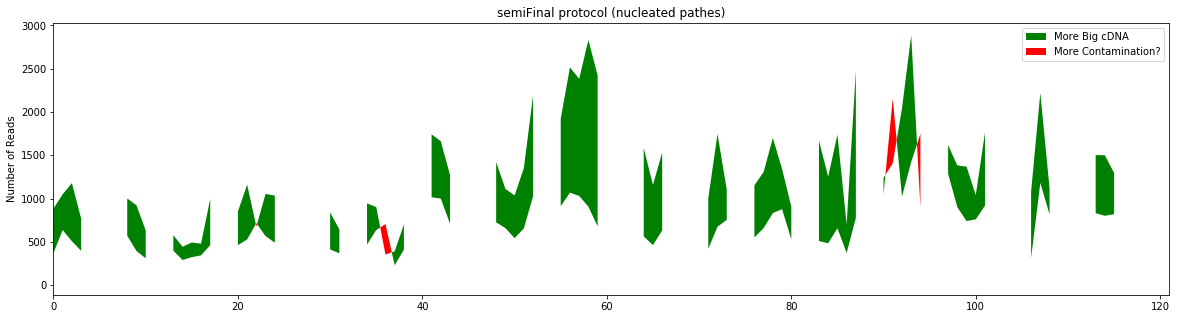

In [166]:
start = 170501
end = 170831
title = 'semiFinal protocol (nucleated pathes)'

plt.figure(figsize =(20,5))

x = np.arange(0,len(df_date[(df_date['date'] > start) & (df_date['date'] < end)]))
y1 = df_date[(df_date['date'] > start) & (df_date['date'] < end)]['avg_<400']
y2 = df_date[(df_date['date'] > start) & (df_date['date'] < end)]['avg_>400']

plt.fill_between(x, y1, y2, where=y2 >= y1, facecolor='green', interpolate=True, label = 'More Big cDNA')
plt.fill_between(x, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True, label = 'More Contamination?')



plt.xlim(0,len(df_date[(df_date['date'] > start) & (df_date['date'] < end)]))
#plt.ylim(0, )
plt.legend()
plt.title(title)
plt.ylabel('Number of Reads')

In [12]:
dated = start_dated
date = datetime.strftime(dated, '%y%m%d')
print int(date)

NameError: name 'start_dated' is not defined

In [13]:
"""
Let's try redoing the date dataframe with a spot for everyday
and gaps for the days we didn't record
"""
columns  = [
            'date', 
            'preps',
            'cells', 
            'avg_ratio',
            'avg_<400',
            'avg_>400', 
            'std_ratio', 
            'std_<400', 
            'std_>400'
           ]

df_date = pd.DataFrame(columns = columns )

start_date = df['Date'].min()
end_date = df['Date'].max()

start_date = datetime.strptime(str(start_date), '%y%m%d')
end_date = datetime.strptime(str(end_date), '%y%m%d')

i = 0
dated = start_dated
while dated <= end_dated:
    date = datetime.strftime(dated, '%y%m%d')
    temp = df[df['Date'] == int(date)]
    preps = len(temp)
    cells = len(temp)
    avg_ratio = temp['Ratio'].mean()
    avg_L400 = temp['<400'].mean()
    avg_G400 = temp['>400'].mean()
    std_ratio = temp['Ratio'].std()
    std_L400 = temp['<400'].std()
    std_G400 = temp['>400'].std()
    df_date.loc[i] = [int(date), 
                       preps, 
                       cells, 
                       avg_ratio, 
                       avg_L400, 
                       avg_G400, 
                       std_ratio, 
                       std_L400, 
                       std_G400]
    i += 1
    dated += timedelta(days = 1)

NameError: name 'start_dated' is not defined

In [169]:
df_date.head(10)

,date,preps,cells,avg_ratio,avg_<400,avg_>400,std_ratio,std_<400,std_>400
0,160413.0,3.0,3.0,0.180000,274.170000,61.980000,NaN,219.540797,54.362697
1,160414.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,160415.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,160416.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,160417.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,160418.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6,160419.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,160420.0,3.0,3.0,0.513333,193.333333,202.333333,0.10116,51.597804,28.023799
8,160421.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
9,160422.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
